In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv('HR_comma_sep.csv')

In [160]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [161]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [162]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [163]:
pd.get_dummies(df['salary'],drop_first = True)

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [164]:
#df[['salary_low','salary_medium']]= pd.get_dummies(df['salary'],drop_first = True)


In [165]:
df['sales'] = df['sales'].replace({'sales' : 1, 'accounting':2, 'hr':3, 'technical':4, 'support':5, 'management':6,
       'IT':7, 'product_mng':8, 'marketing':9, 'RandD':10})

In [166]:
df['salary'] = df['salary'].replace({'low':1,'medium':2,'high':3})

In [167]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5,1
14995,0.37,0.48,2,160,3,0,1,0,5,1
14996,0.37,0.53,2,143,3,0,1,0,5,1
14997,0.11,0.96,6,280,4,0,1,0,5,1


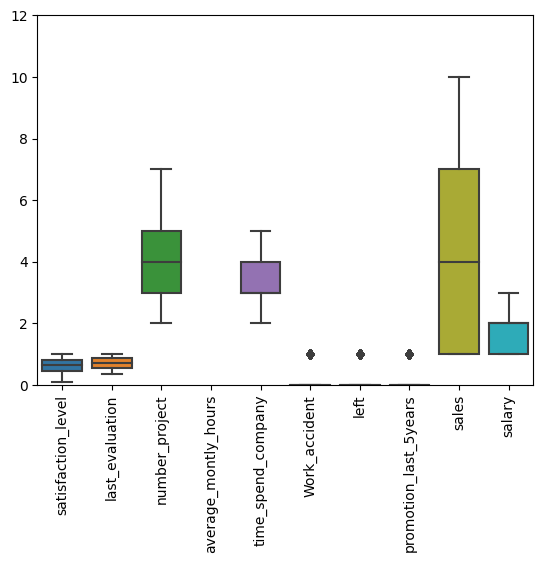

In [211]:
sns.boxplot(df)
plt.ylim(0,12)
plt.xticks(rotation = 90);

(0.0, 11.0)

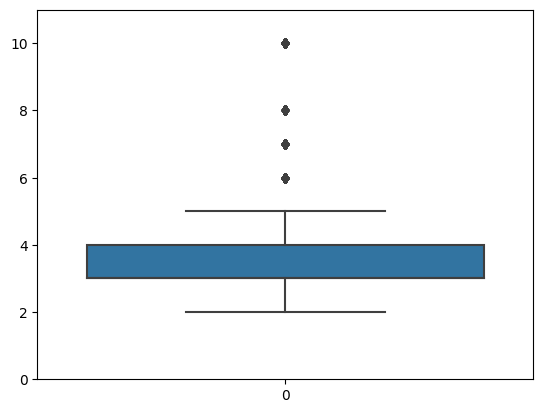

In [169]:
sns.boxplot(df['time_spend_company'])
plt.ylim(0,11)

In [170]:
def func(n):
    if n >= 6:
        return df['time_spend_company'].median()
    else:
        return n

In [171]:
df['time_spend_company'] = df['time_spend_company'].apply(func)

<AxesSubplot: >

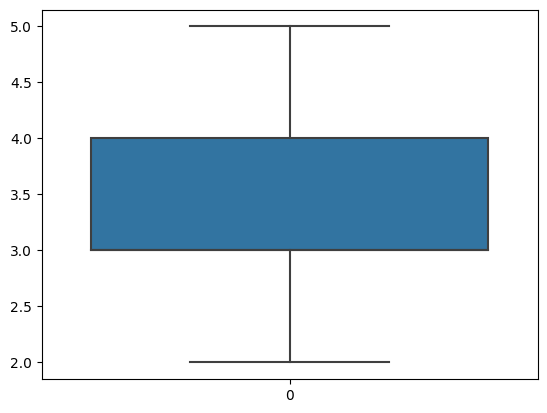

In [172]:
sns.boxplot(df['time_spend_company'])

In [173]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [174]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [175]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [176]:
X = df.drop('Work_accident',axis = 1)
X = X.drop('salary',axis = 1)
X = X.drop('promotion_last_5years',axis = 1)
y = df['salary']

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [210]:
test_error = []
for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_pred = model.predict(X_test)
    test_error.append(1-accuracy_score(test_pred,y_test))

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

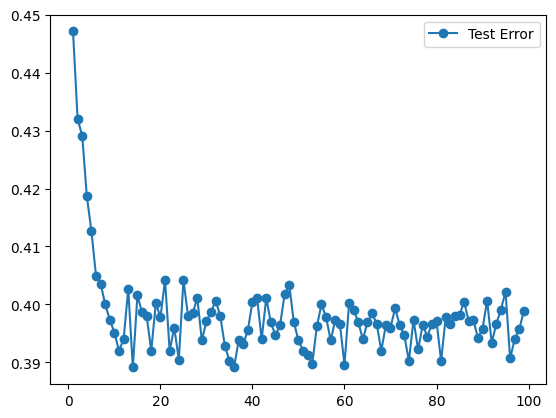

In [212]:
plt.plot(range(1,100),test_error,label='Test Error',marker = 'o')
plt.legend()

In [198]:
from sklearn.model_selection import GridSearchCV

In [199]:
n_estimators=range(0,40)
bootstrap = [True,False]
oob_score = [True,False]

In [200]:
param_grid = {'n_estimators':n_estimators,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [201]:
rfc = RandomForestClassifier()

In [202]:
grid = GridSearchCV(rfc,param_grid)

In [203]:
grid.fit(X_train,y_train)

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do no

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do no

C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\User\Desktop\mll\venv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do no

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': range(0, 40),
                         'oob_score': [True, False]})

In [204]:
grid.best_params_

{'bootstrap': False, 'n_estimators': 9, 'oob_score': False}

In [205]:
y_pred = grid.predict(X_test)

In [206]:
accuracy_score(y_test,y_pred)

0.6031111111111112

In [207]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.62      0.68      0.65      2217
           2       0.58      0.58      0.58      1910
           3       0.60      0.29      0.39       373

    accuracy                           0.60      4500
   macro avg       0.60      0.52      0.54      4500
weighted avg       0.60      0.60      0.60      4500



In [208]:
confusion_matrix(y_test,y_pred)

array([[1505,  674,   38],
       [ 775, 1100,   35],
       [ 145,  119,  109]], dtype=int64)